In [1]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
X, y = datasets.load_diabetes(return_X_y=True)
X /= X.std(axis=0)
eps = 5e-3
print("Computing regularization path using Lasso  ")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps, fit_intercept=False)

print('Computing regularization path using positive Lasso  ')
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(X, y, eps=eps, positive=True,
                                                           fit_intercept=False)
print('Computing regularization path using the Elastic Net    ')
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print('Computing regularization path using the positive Elastic Net   ')
alphas_positive_enet, coefs_positive_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8,
                                                        positive=True, fit_intercept=False)


Computing regularization path using Lasso  
Computing regularization path using positive Lasso  
Computing regularization path using the Elastic Net    
Computing regularization path using the positive Elastic Net   


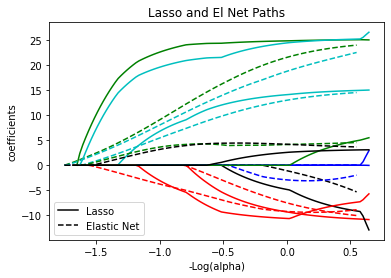

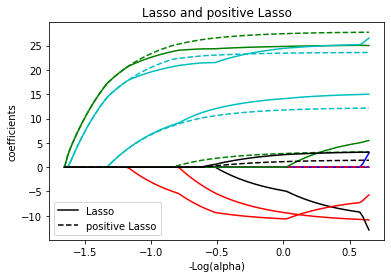

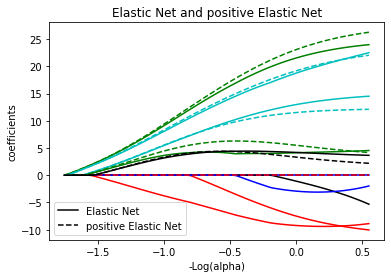

In [5]:
plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_1, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_1, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)
    
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and El Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic Net'), loc='lower left')


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_1, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_1, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')

plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic Net and positive Elastic Net')
plt.legend((l1[-1], l2[-1]), ('Elastic Net', 'positive Elastic Net'), loc='lower left')
plt.axis('tight')
plt.show()